<a href="https://colab.research.google.com/github/Jose-Bruno/VisualizacaoComputacional/blob/main/Jos%C3%A9_Bruno_da_Silva_Santos_Visualiza%C3%A7%C3%A3o_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

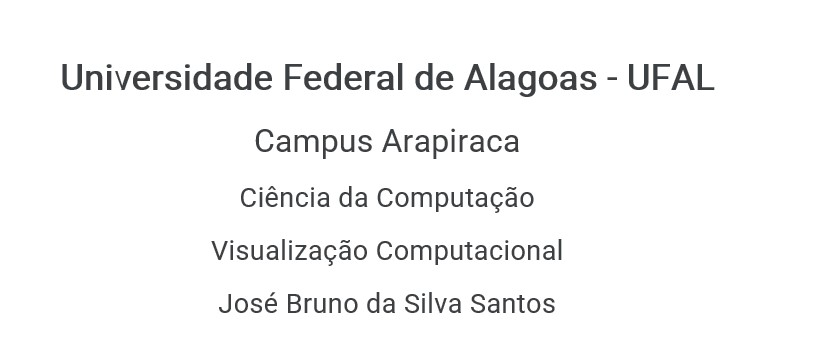

# **Projeto da Disciplina - Painel Covid-19 em Alagoas.**

**Os dados utilizados são referentes a atualização feita no dia 16/02/2022**

In [253]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [255]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dados/dadosabertos (3).csv', encoding='latin-1', sep=';')

In [256]:
dados = dados.rename(columns={'CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)': 'CLASSIFICAÇÃO'})
dados = dados.rename(columns={'Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?': 'Situação do paciente confirmado'})
dados = dados.rename(columns={'Data do Óbito (Caso haja)': 'Data do Óbito'})

In [257]:
dados.head(10)

,Unnamed: 0,Data de atendimento no Serviço,IDADE,SEXO,MUNICÍPIO DE RESIDÊNCIA,CLASSIFICAÇÃO,Comorbidades,Situação do paciente confirmado,Data do Óbito,Data de Confirmação do Exame
0,0,26/03/2020,1,F,MACEIÓ,CONFIRMADO,SEM COMORBIDADE,RECUPERADO,NaN,13/04/2020
1,1,23/03/2020,38,M,MACEIÓ,CONFIRMADO,DOENÇA PULMONAR CRÔNICA,RECUPERADO,NaN,14/04/2020
2,2,06/04/2020,35,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,14/04/2020
3,3,11/04/2020,57,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,14/04/2020
4,4,27/04/2020,60,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,14/04/2020
5,5,04/03/2020,42,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,08/03/2020
6,6,14/03/2020,21,M,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,18/03/2020
7,7,14/03/2020,25,F,MACEIÓ,CONFIRMADO,NaN,RECUPERADO,NaN,18/03/2020
8,8,14/03/2020,44,F,MACEIÓ,CONFIRMADO,HAS,RECUPERADO,NaN,18/03/2020
9,9,16/03/2020,38,M,MACEIÓ,CONFIRMADO,ASMA,RECUPERADO,NaN,19/03/2020


**Normalizando Dados**

In [258]:
dados["MUNICÍPIO DE RESIDÊNCIA"] = dados["MUNICÍPIO DE RESIDÊNCIA"].str.upper()
dados["Situação do paciente confirmado"] = dados["Situação do paciente confirmado"].str.upper()

# Painel Geral

In [259]:
confirmados =  len(dados[(dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
descartados = 470284  #valor referente a 16/02/2022
testados = confirmados + descartados

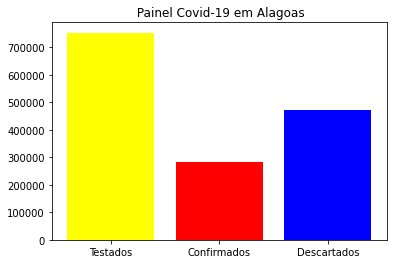

In [260]:
valores = [testados, confirmados, descartados]
legendas = ["Testados", "Confirmados", "Descartados"]

plt.bar(legendas, valores, color=['yellow', 'red', 'blue'])
plt.title(' Painel Covid-19 em Alagoas')
plt.show()

In [261]:
lista1 = [testados, confirmados, descartados]
legenda1 = ["Testados", "Confirmados", "Descartados"]
painel_geral = pd.DataFrame(list(zip(legenda1, lista1)), columns = ['Casos','Nº de Casos'])
painel_geral.head()

,Casos,Nº de Casos
0,Testados,753031
1,Confirmados,282747
2,Descartados,470284


# Situação do Paciente

In [262]:
recuperado =  len(dados[(dados['Situação do paciente confirmado'] == 'RECUPERADO')])
obito = len(dados[(dados['Situação do paciente confirmado'] == 'ÓBITO') | (dados['Situação do paciente confirmado'] == 'óbITO')])
hospitalizado = len(dados[(dados['Situação do paciente confirmado'] == 'HOSPITALIZADO') | (dados['Situação do paciente confirmado'] == 'Hospitalizado')])
isolamento = len(dados[(dados['Situação do paciente confirmado'] == 'ISOLAMENTO DOMICILIAR')])
obito_outros = len(dados[(dados['Situação do paciente confirmado'] == 'ÓBITO POR OUTRAS CAUSAS')])

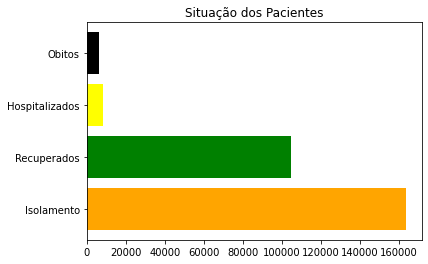

In [288]:
situação = ["Isolamento", "Recuperados", "Hospitalizados", "Obitos"]
valores = [isolamento, recuperado, hospitalizado, obito]

plt.barh(situação, valores, color=['orange', 'green', 'yellow', 'black'])
plt.title('Situação dos Pacientes')
plt.show()

In [264]:
lista2 = [obito_outros, obito, hospitalizado, recuperado, isolamento]
legenda2 = ["Obítos por Outras Causas", "Obitos", "Hospitalizados", "Recuperados", "Isolamento"]
situacao = pd.DataFrame(list(zip(legenda2, lista2)), columns = ['Situação dos Pacientes','Nº de Casos Confirmados por Sexo'])
situacao.head()

,Situação dos Pacientes,Nº de Casos Confirmados por Sexo
0,Obítos por Outras Causas,31
1,Obitos,6544
2,Hospitalizados,8439
3,Recuperados,104459
4,Isolamento,163274


# Casos Confirmados por Sexo

In [265]:
casos_confirmados_homens = len(dados[(dados['SEXO'] == 'M') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
casos_confirmados_mulheres = len(dados[(dados['SEXO'] == 'F') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])

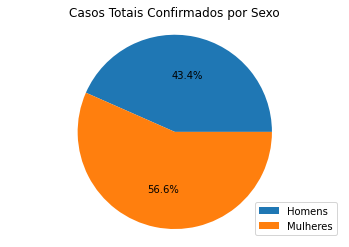

In [266]:
valores = [casos_confirmados_homens, casos_confirmados_mulheres]
legenda = ["Homens", "Mulheres"]

plt.pie(valores, autopct='%1.1f%%')
plt.legend(legenda, loc=4)
plt.axis('equal')
plt.title('Casos Totais Confirmados por Sexo')
plt.show()

In [267]:
lista3 = [casos_confirmados_homens, casos_confirmados_mulheres]
legenda3 = ["Homens", "Mulheres"]
casos_confirmados = pd.DataFrame(list(zip(legenda3, lista3)), columns = ['Sexo','Nº de Casos Confirmados por Sexo'])
casos_confirmados.head()

,Sexo,Nº de Casos Confirmados por Sexo
0,Homens,122493
1,Mulheres,159801


# Obitos

In [268]:
casos_obitos_homens = len(dados[(dados['SEXO'] == 'M') & (dados['Situação do paciente confirmado'] == 'ÓBITO')])
casos_obitos_Mulheres = len(dados[(dados['SEXO'] == 'F') & (dados['Situação do paciente confirmado'] == 'ÓBITO')])

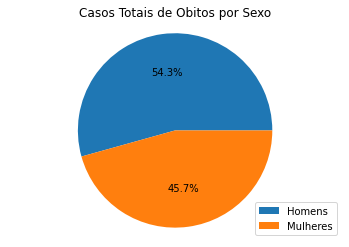

In [269]:
valores = [casos_obitos_homens, casos_obitos_Mulheres]
legenda = ["Homens", "Mulheres"]

plt.pie(valores, autopct='%1.1f%%')
plt.legend(legenda, loc=4)
plt.axis('equal')
plt.title('Casos Totais de Obitos por Sexo')
plt.show()

In [270]:
lista4 = [casos_obitos_homens, casos_obitos_Mulheres]
legenda4 = ["Homens", "Mulheres"]
obitos = pd.DataFrame(list(zip(legenda4, lista4)), columns = ['Sexo','Nº de Mortes por Sexo'])
obitos.head()

,Sexo,Nº de Mortes por Sexo
0,Homens,3553
1,Mulheres,2987


# **Situação de Casos Confirmados por Municipio**

In [271]:
municipios_df = dados["MUNICÍPIO DE RESIDÊNCIA"] 
municipios = []
n_obitos = []
n_hospitalizados = []
n_recuperados = []
n_isolamento = []
c_confirmados = []

for x in municipios_df:
  if x not in municipios:
    municipios.append(x)

    nr = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == x) & (dados['Situação do paciente confirmado'] == 'RECUPERADO')])
    n_recuperados.append(nr)

    no = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == x) & (dados['Situação do paciente confirmado'] == 'ÓBITO')])
    n_obitos.append(no)
    
    nh = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == x) & (dados['Situação do paciente confirmado'] == 'HOSPITALIZADO')])
    n_hospitalizados.append(nh)

    ni = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == x) & (dados['Situação do paciente confirmado'] == 'ISOLAMENTO DOMICILIAR')])
    n_isolamento.append(ni)

    cc = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == x) & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
    c_confirmados.append(cc)


In [272]:
situacao = pd.DataFrame(municipios, columns = ['Municipios'])
situacao = situacao.assign(Casos_Confirmados  = c_confirmados)
situacao = situacao.assign(Isolamento = n_isolamento)
situacao = situacao.assign(Recuperados = n_recuperados)
situacao = situacao.assign(Hospitalizados = n_hospitalizados)
situacao = situacao.assign(Óbitos = n_obitos)
situacao.sort_values(by=['Casos_Confirmados'], ascending=False)

,Municipios,Casos_Confirmados,Isolamento,Recuperados,Hospitalizados,Óbitos
0,MACEIÓ,110407,57255,45855,4400,2886
9,ARAPIRACA,34843,22698,10876,725,542
3,MARECHAL DEODORO,8040,6250,1495,172,123
1,PALMEIRA DOS ÍNDIOS,5909,4300,1248,201,160
42,SANTANA DO IPANEMA,5763,4345,1199,111,107
...,...,...,...,...,...,...
86,BELÉM,200,151,33,8,8
95,JUNDIÁ,193,66,115,7,5
83,OLHO D'ÁGUA DO CASADO,188,129,49,4,6
84,FELIZ DESERTO,176,132,35,4,5


# **Casos por municipio de residência**



> **Maiores numero de casos**



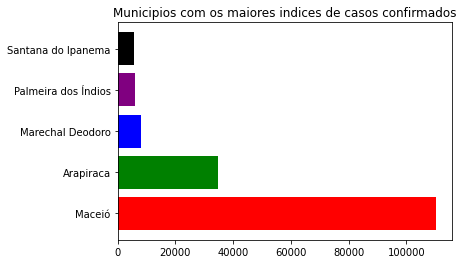

In [286]:
maceio = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'MACEIÓ') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
arapiraca = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'ARAPIRACA') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
marechal = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'MARECHAL DEODORO') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
palmeira = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'PALMEIRA DOS ÍNDIOS') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])
santana = len(dados[(dados['MUNICÍPIO DE RESIDÊNCIA'] == 'SANTANA DO IPANEMA') & (dados['CLASSIFICAÇÃO'] == 'CONFIRMADO')])

municipios = [maceio, arapiraca, marechal, palmeira, santana]
legendas = ['Maceió', 'Arapiraca', 'Marechal Deodoro', 'Palmeira dos Índios', "Santana do Ipanema"]

plt.barh(legendas, municipios, color=['red', 'green', 'blue', 'purple', 'black'])
plt.title('Municipios com os maiores indices de casos confirmados')
plt.show()




> **Menores numeros de casos**

